In [1]:
from octis.dataset.dataset import Dataset
import hdbscan
import sys
sys.path.append('C:\\Users\\Martin\\Documents\\GitHub\\master\\evaluation')
import trainer
import helper
import pandas as pd

In [2]:
from sentence_transformers import SentenceTransformer

In [3]:
import multimodal
import c_tf_idf
import multimodalModel

In [4]:
output_folder = './results/experiment_3_2'
dataset_folder = './multimodal_custom_octis_dataset/'

In [5]:
mm_dataset = Dataset()
mm_dataset.load_custom_dataset_from_folder(dataset_folder)

In [6]:
image_embedding_model = SentenceTransformer("clip-ViT-B-32")

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [7]:
text_embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [8]:

path_to_data = './multimodal_data.tsv'

try:
    texts, images = multimodal.get_image_and_text_from_file(path_to_data)
except FileNotFoundError:
    base_path = '..\\data\\processed'
    ends = ['processed_part-00000-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00001-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00002-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00003-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00004-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,]
    paths = [f'{base_path}\\{end}' for end in ends]
    df = helper.load_all_data(paths)
    df.to_csv(path_to_data, index=False, sep='\t')
    texts, images = helper.get_image_and_text_from_df(df)


In [9]:
text_embed = multimodal.get_embeddings_from_text(texts, text_embedding_model)
image_embed = multimodal.get_embeddings_from_images(images, image_embedding_model)

 37%|███▋      | 34/91 [00:34<00:58,  1.03s/it]c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 91/91 [01:24<00:00,  1.07it/s]


In [10]:
metricsloader = trainer.MetricsLoader(dataset_folder)

In [11]:
params = {'path_to_data':path_to_data,
'embedding_model':image_embedding_model, # not used

'precomputed_text_embeds':text_embed,
'precomputed_image_embeds':image_embed,
'combined_embed':text_embed
}
base_name = 'experiment_3_2_diff_embeds'

min_cluster_size = 200
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
params['clusterer']=clusterer

get_extra_info = True
fitted_clusterers = []
image_representatives = []
top_terms_representatives = []
mm_trainer = trainer.Trainer(custom_dataset_folder=dataset_folder, params=params, metrics_loader=metricsloader)
helper.run_experiment(mm_trainer, output_folder, name=f'{base_name}unrestricted_topics_min_cluster_size_{min_cluster_size}', num_times=10)
if get_extra_info:
    last_fit_clusterer = mm_trainer.model.clusterer
    fitted_clusterers.append(last_fit_clusterer)

    mm_trainer.model.find_image_representatives()
    last_fit_images = mm_trainer.model.cluster_images
    last_fit_terms = mm_trainer.model.top_terms

    image_representatives.append(last_fit_images)
    top_terms_representatives.append(last_fit_terms)

start:14042023_08_37_12


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 172858.23it/s]


diversity:0.9333333333333333
wetc:0.6020030825352167


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 230752.19it/s]


diversity:0.9333333333333333
wetc:0.6111576802955395


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 242163.95it/s]


diversity:0.9333333333333333
wetc:0.6407509137169082


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 228592.71it/s]


diversity:0.925
wetc:0.6151146956194717


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 197255.43it/s]


diversity:0.9
wetc:0.6834342662528836


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 188150.70it/s]


diversity:0.9
wetc:0.6326289915780597


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 191839.49it/s]


diversity:0.9333333333333333
wetc:0.6283411150469542


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 210856.57it/s]


diversity:1.0
wetc:0.6704171100599322


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 228593.47it/s]


diversity:0.9333333333333333
wetc:0.6595421435168521


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 48919/48919 [00:00<00:00, 224397.68it/s]


diversity:0.9333333333333333
wetc:0.6277133649907786
end:14042023_09_38_03


In [12]:
#for fc in fitted_clusterers:
#    fc.condensed_tree_.plot(select_clusters=True)

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\ipyplot\_utils.py:95: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



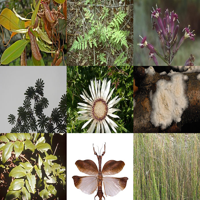
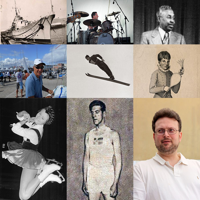
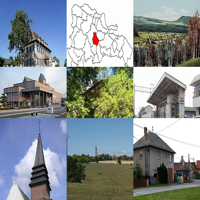


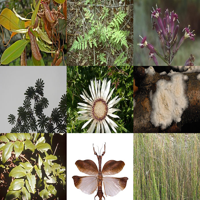
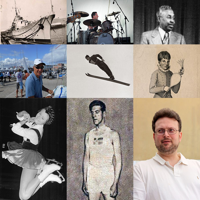
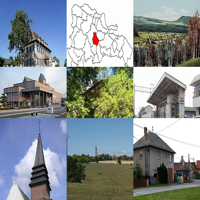

In [13]:
import ipyplot
for nr in range(len(image_representatives)):
    ipyplot.plot_images([*image_representatives[nr].values()],custom_texts=top_terms_representatives[nr], max_images=20, img_width=150)
        